<a href="https://colab.research.google.com/github/bluepsm/customers-segmentation/blob/main/customer_segmentation_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation

**Objective:** Segment customers into distinct groups based on their purchasing behavior.

**Skills:** Clustering algorithms (e.g., k-means, hierarchical clustering), dimensionality reduction (PCA), feature scaling.

# Import library

In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import sys
import math
from sklearn.metrics import mean_squared_error
import numpy.linalg as nla
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Import dataset

In [190]:
dataset = pd.read_csv('/content/drive/MyDrive/datasets/mall_customer/Mall_Customers.csv', index_col='CustomerID', skipinitialspace=True)

# Data overview

In [191]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [192]:
dataset.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [193]:
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


# Plot graph

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

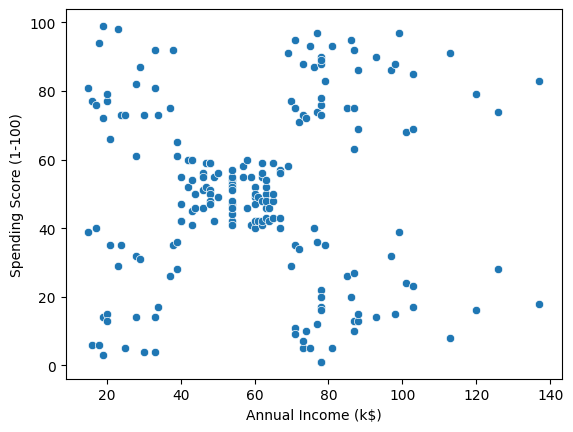

In [194]:
sns.scatterplot(data=dataset, x='Annual Income (k$)', y='Spending Score (1-100)')

# Prepare data

In [195]:
dataset_backup = dataset.copy()

##Mapping genders

In [196]:
gender = {'Male': 0, 'Female': 1}
dataset['Gender'] = dataset['Gender'].map(gender)

dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40
...,...,...,...,...
196,1,35,120,79
197,1,45,126,28
198,0,32,126,74


## Normalizing

### Quantiled Normalization

In [197]:
# dataset['Age'] = pd.qcut(dataset['Age'], 10, labels=False)
# dataset['Annual Income (k$)'] = pd.qcut(dataset['Annual Income (k$)'], 10, labels=False)
# dataset['Spending Score (1-100)'] = pd.qcut(dataset['Spending Score (1-100)'], 10, labels=False)

# dataset['Age'].value_counts()

In [198]:
# dataset['Age'] = MinMaxScaler().fit_transform(np.array(dataset['Age']).reshape(-1, 1))
# dataset['Annual Income (k$)'] = MinMaxScaler().fit_transform(np.array(dataset['Annual Income (k$)']).reshape(-1, 1))
# dataset['Spending Score (1-100)'] = MinMaxScaler().fit_transform(np.array(dataset['Spending Score (1-100)']).reshape(-1, 1))

# dataset

### Data Scaling

In [199]:
dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']] = StandardScaler().fit_transform(dataset[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,0,-1.424569,-1.738999,-0.434801
2,0,-1.281035,-1.738999,1.195704
3,1,-1.352802,-1.700830,-1.715913
4,1,-1.137502,-1.700830,1.040418
5,1,-0.563369,-1.662660,-0.395980
...,...,...,...,...
196,1,-0.276302,2.268791,1.118061
197,1,0.441365,2.497807,-0.861839
198,0,-0.491602,2.497807,0.923953


#Data Clustering

## Find optimal number of clusters

In [200]:
K = range(2, 8)
fits = []
score = []


for k in K:
  # train the model for current value of k on training data
  model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(dataset[['Annual Income (k$)', 'Spending Score (1-100)']])

  # append the model to fits
  fits.append(model)

  # Append the silhouette score to scores
  score.append(silhouette_score(dataset[['Annual Income (k$)', 'Spending Score (1-100)']], model.labels_, metric='euclidean'))

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

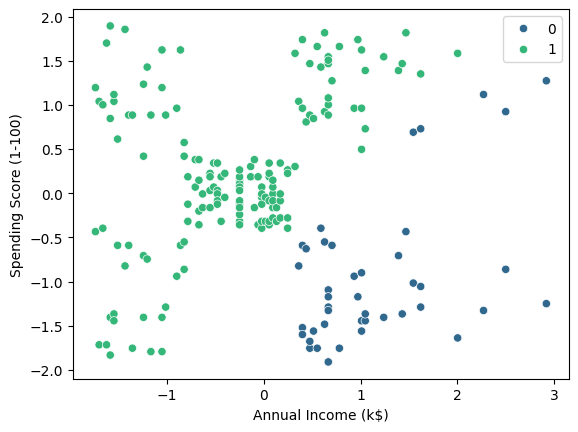

In [201]:
sns.scatterplot(data = dataset, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = fits[0].labels_,  palette='viridis')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

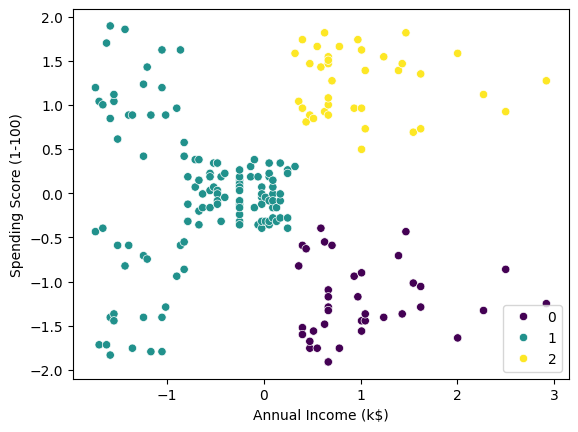

In [202]:
sns.scatterplot(data = dataset, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = fits[1].labels_,  palette='viridis')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

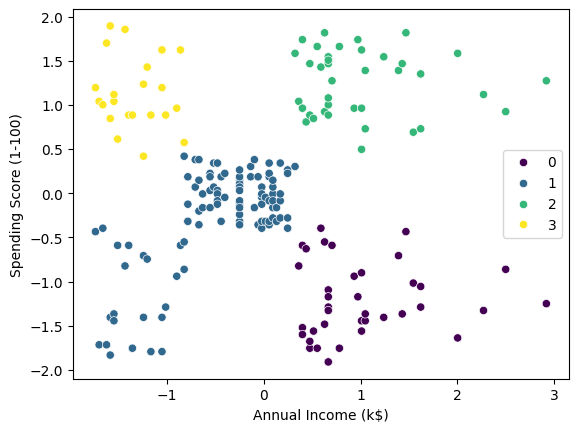

In [203]:
sns.scatterplot(data = dataset, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = fits[2].labels_,  palette='viridis')

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

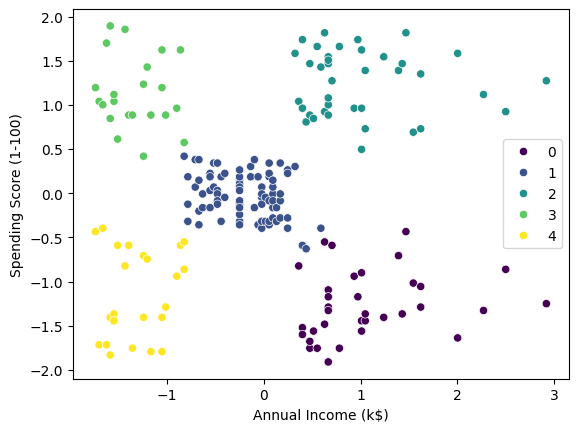

In [204]:
sns.scatterplot(data = dataset, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = fits[3].labels_,  palette='viridis')

<Axes: >

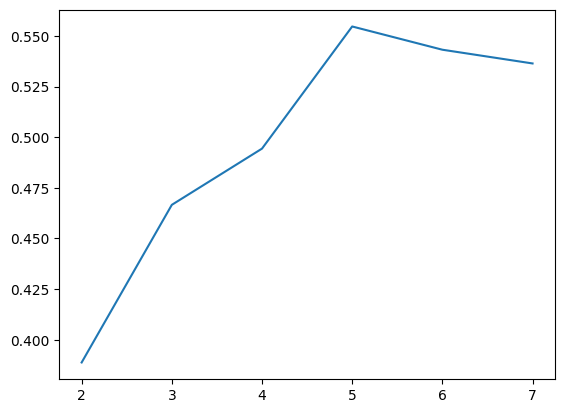

In [205]:
sns.lineplot(x = K, y = score)

## Clustering build from scratch

In [206]:
def dfSimilarity(df, centroids):
  ### dfSimilarity = Calculate similarities for dataframe input
  ### We need to calculate ||a-b||^2 = |a|^2 + |b|^2 - 2*|a|*|b|
  ### Implement this with matrix operations
  ### See the Appendix for further explanation
  numPoints = len(df.index)
  numCentroids = len(centroids.index)
  ## Strictly speaking, we don't need to calculate the norm of points
  # because it adds a constant bias to distances
  # But calculating it so that the similarity doesn't go negative
  # And that we expect similarities in [0,1] which aids debugging
  pointNorms = np.square(nla.norm(df, axis=1))
  pointNorms = np.reshape(pointNorms, [numPoints, 1])
  ## Calculate the norm of centroids
  centroidNorms = np.square(nla.norm(centroids, axis=1))
  centroidNorms = np.reshape(centroidNorms, (1, numCentroids))
  ## Calculate |a|^2 + |b|^2 - 2*|a|*|b|
  similarities = pointNorms + centroidNorms - 2.0 * np.dot(
      df, np.transpose(centroids))
  # Divide by the number of features
  # Which is 10 because the one-hot encoding means the "Maker" and "Bean" are
  # weighted twice
  similarities = similarities / 2.0
  # numerical artifacts lead to negligible but negative values that go to NaN on the root
  similarities = similarities.clip(min=0.0)
  # Square root since it's ||a-b||^2
  similarities = np.sqrt(similarities)

  return similarities


def initCentroids(df, k, feature_cols):
  # Pick 'k' examples are random to serve as initial centroids
  limit = len(df.index)
  centroids_key = np.random.randint(0, limit - 1, k)
  centroids = df.iloc[centroids_key, :][feature_cols].copy(deep=True)
  # the indexes get copied over so reset them
  centroids.reset_index(drop=True, inplace=True)

  return centroids


def pt2centroid(df, centroids, feature_cols):
  ### Calculate similarities between all points and centroids
  ### And assign points to the closest centroid + save that distance
  numCentroids = len(centroids.index)
  numExamples = len(df.index)
  # dfSimilarity = Calculate similarities for dataframe input
  dist = dfSimilarity(df.loc[:, feature_cols], centroids.loc[:, feature_cols])
  df.loc[:, 'centroid'] = np.argmin(dist, axis=1)  # closest centroid
  df.loc[:, 'pt2centroid'] = np.min(dist, axis=1)  # minimum distance

  return df


def recomputeCentroids(df, centroids, feature_cols):
  ### For every centroid, recompute it as an average of the points
  ### assigned to it
  numCentroids = len(centroids.index)
  for cen in range(numCentroids):
    dfSubset = df.loc[df['centroid'] == cen,
                      feature_cols]  # all points for centroid
    if not (dfSubset.empty):  # if there are points assigned to the centroid
      clusterAvg = np.sum(dfSubset) / len(dfSubset.index)
      centroids.loc[cen] = clusterAvg

  return centroids


def kmeans(df, k, feature_cols, verbose):
  flagConvergence = False
  maxIter = 100
  iter = 0  # ensure kmeans doesn't run for ever
  centroids = initCentroids(df, k, feature_cols)
  while not (flagConvergence):
    iter += 1
    #Save old mapping of points to centroids
    oldMapping = df['centroid'].copy(deep=True)
    # Perform k-means
    df = pt2centroid(df, centroids, feature_cols)
    centroids = recomputeCentroids(df, centroids, feature_cols)
    # Check convergence by comparing [oldMapping, newMapping]
    newMapping = df['centroid']
    flagConvergence = all(oldMapping == newMapping)
    if verbose == 1:
      print('Total distance:' + str(np.sum(df['pt2centroid'])))
    if (iter > maxIter):
      print('k-means did not converge! Reached maximum iteration limit of ' \
            + str(maxIter) + '.')
      sys.exit()
      return
  print('k-means converged for ' + str(k) + ' clusters' + \
        ' after ' + str(iter) + ' iterations!')

  return [df, centroids]

In [207]:
dataset_cluster_scratch = dataset.copy()

k = 5  #@param

feature_cols = dataset_cluster_scratch.columns.values  # save original columns
# initialize every point to an impossible value, the k+1 cluster
dataset_cluster_scratch['centroid'] = k
# init the point to centroid distance to an impossible value "2" (>1)
dataset_cluster_scratch['pt2centroid'] = 2
[dataset_cluster_scratch, centroids] = kmeans(dataset_cluster_scratch, k, feature_cols, 1)
print("Data for the first few customers, with 'centroid' and 'pt2centroid' on"
      ' the extreme right:')
dataset_cluster_scratch.head()

Total distance:197.97167234013995
Total distance:155.47291576720153
Total distance:144.92333551731133
Total distance:141.91706428267952
Total distance:141.78141237593837
k-means converged for 5 clusters after 5 iterations!
Data for the first few customers, with 'centroid' and 'pt2centroid' on the extreme right:


,Gender,Age,Annual Income (k$),Spending Score (1-100),centroid,pt2centroid
CustomerID,,,,,,
1,0,-1.424569,-1.738999,-0.434801,4,1.053872
2,0,-1.281035,-1.738999,1.195704,4,0.977020
3,1,-1.352802,-1.700830,-1.715913,4,1.701114
4,1,-1.137502,-1.700830,1.040418,4,0.826306
5,1,-0.563369,-1.662660,-0.395980,4,0.959647


In [208]:
clusterNumber = 4  #@param
dataset_backup.loc[dataset_cluster_scratch['centroid'] == clusterNumber, :]

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
6,Female,22,17,76
8,Female,23,18,94
10,Female,30,19,72
12,Female,35,19,99


<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

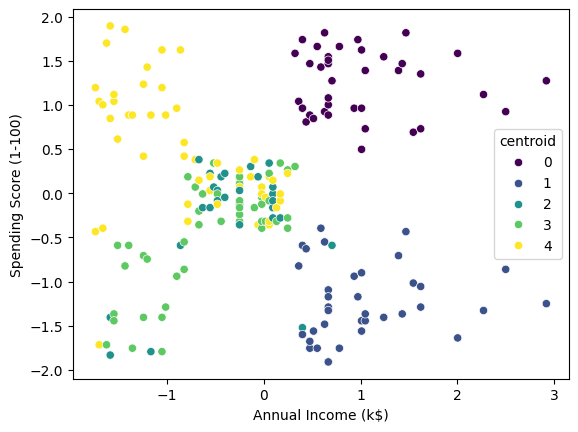

In [209]:
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='centroid', data=dataset_cluster_scratch, palette='viridis')

##Clustering with KMeans from Sklearn library

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

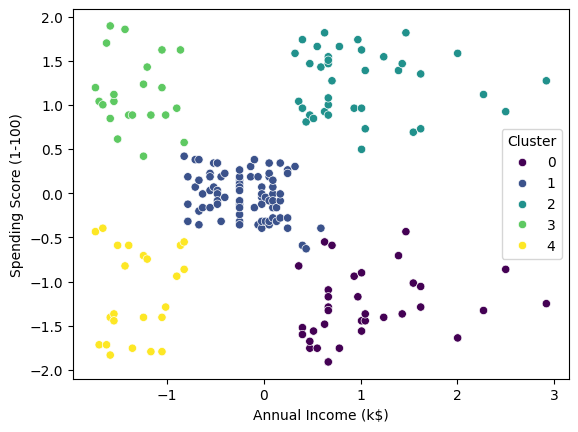

In [210]:
dataset_cluster_sklearn = dataset.copy()

kmeans = KMeans(n_clusters=5, random_state=0, n_init='auto')
kmeans.fit(dataset_cluster_sklearn[['Annual Income (k$)', 'Spending Score (1-100)']])
dataset_cluster_sklearn['Cluster'] = kmeans.labels_

sns.scatterplot(data=dataset_cluster_sklearn, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='viridis')

In [211]:
silhouette_score(dataset_cluster_sklearn[['Annual Income (k$)', 'Spending Score (1-100)']], kmeans.labels_, metric='euclidean')

0.5546571631111091

<Axes: ylabel='Spending Score (1-100)'>

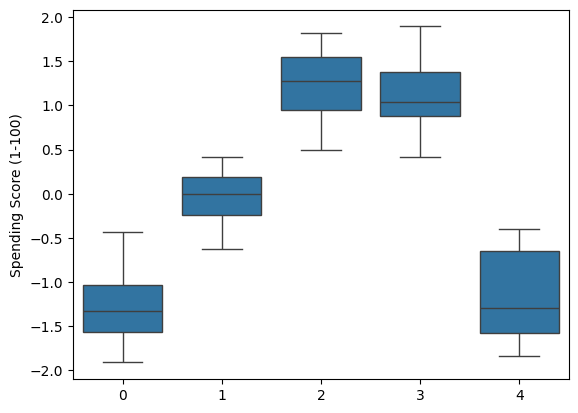

In [212]:
sns.boxplot(x = kmeans.labels_, y = dataset_cluster_sklearn['Spending Score (1-100)'])

<Axes: ylabel='Annual Income (k$)'>

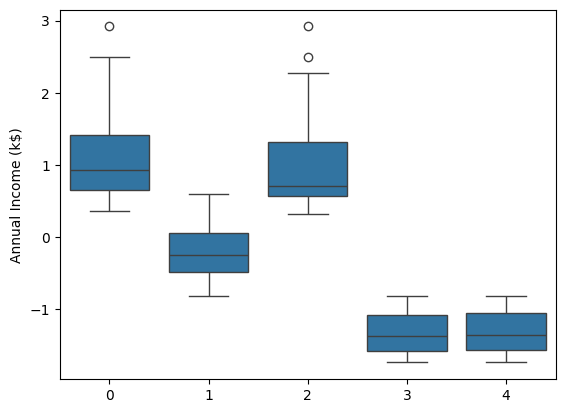

In [213]:
sns.boxplot(x = kmeans.labels_, y = dataset_cluster_sklearn['Annual Income (k$)'])

# Quality Metrics for Clusters

## Plot Quality

In [214]:
def clusterCardinality(df):
  k = np.max(df['centroid']) + 1
  k = k.astype(int)
  print('Number of clusters:' + str(k))
  clCard = np.zeros(k)
  for kk in range(k):
    clCard[kk] = np.sum(df['centroid'] == kk)
  clCard = clCard.astype(int)
  # print "Cluster Cardinality:"+str(clCard)
  plt.figure()
  plt.bar(range(k), clCard)
  plt.title('Cluster Cardinality')
  plt.xlabel('Cluster Number: ' + str(0) + ' to ' + str(k - 1))
  plt.ylabel('Points in Cluster')
  return clCard


def clusterMagnitude(df):
  k = np.max(df['centroid']) + 1
  k = k.astype(int)
  cl = np.zeros(k)
  clMag = np.zeros(k)
  for kk in range(k):
    idx = np.where(df['centroid'] == kk)
    idx = idx[0]
    pt2centroid_idx = df.columns.get_loc('pt2centroid')
    clMag[kk] = np.sum(df.iloc[idx, pt2centroid_idx])
  # print "Cluster Magnitude:",clMag #precision set using np pref
  plt.figure()
  plt.bar(range(k), clMag)
  plt.title('Cluster Magnitude')
  plt.xlabel('Cluster Number: ' + str(0) + ' to ' + str(k - 1))
  plt.ylabel('Total Point-to-Centroid Distance')
  return clMag


def plotCardVsMag(clCard, clMag):
  plt.figure()
  plt.scatter(clCard, clMag)
  plt.xlim(xmin=0)
  plt.ylim(ymin=0)
  plt.title('Magnitude vs Cardinality')
  plt.ylabel('Magnitude')
  plt.xlabel('Cardinality')


def clusterQualityMetrics(df):
  clCard = clusterCardinality(df)
  clMag = clusterMagnitude(df)
  plotCardVsMag(clCard, clMag)

Number of clusters:5


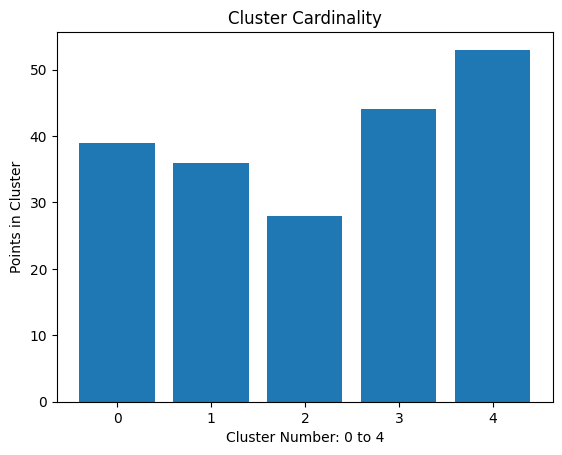

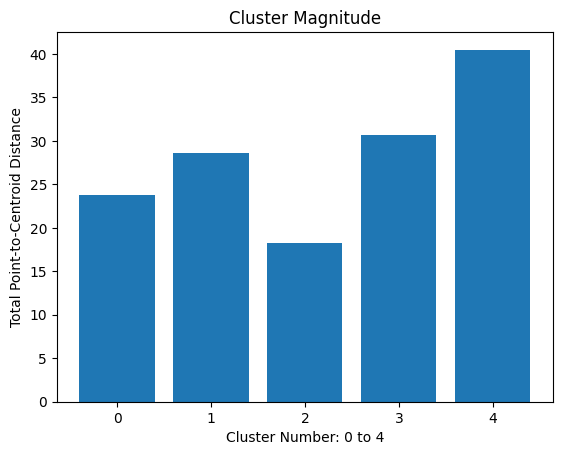

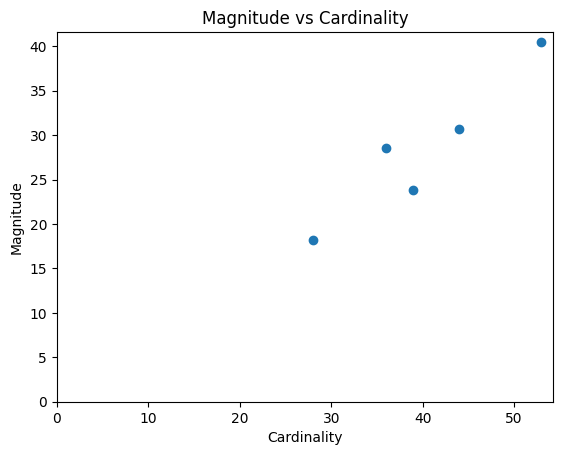

In [215]:
clusterQualityMetrics(dataset_cluster_scratch)

## Check Similarity

In [216]:
# def getSimilarity(obj1, obj2):
#   len1 = len(obj1.index)
#   len2 = len(obj2.index)
#   if not (len1 == len2):
#     print("Error: Compared objects must have same number of features.")
#     sys.exit()

#     return 0
#   else:
#     # similarity = obj1 - obj2
#     # similarity = np.sum((similarity**2.0) / 4.0)
#     # similarity = 1 - math.sqrt(similarity)

#     similarity = mean_squared_error(obj1, obj2, squared=False)
#     similarity = 1 - similarity

#     return similarity

In [217]:
# customerIdx = 0  #@param
# customersIdxToCompare = [10, 20]  #@param

# print("Similarity between customers ID " + str(customerIdx + 1) + " and ...")

# for i in range(customersIdxToCompare[0], customersIdxToCompare[1] + 1):
#   print(str(i + 1) + ": " + str(
#       getSimilarity(dataset.iloc[customerIdx], dataset.iloc[i])))

# print("\n\nFeature data for customers ID " + str(customerIdx + 1))
# print(dataset_backup.iloc[customerIdx, :])
# print("\n\nFeature data for compared customers index " + str(customersIdxToCompare))
# print(dataset_backup.iloc[customersIdxToCompare[0]:customersIdxToCompare[1] + 1, :])